# Receipt OCR notebook series: Problem definition

> Given a arbitrary photo containing a receipt, extract grand total number

![](https://storage.googleapis.com/www.forwardit.lv/kaggle/receipt_home_kaggle.png)

The solution is divided into smaller tasks:

1. Get a scanned version of receipt by restoring perspective (done in the [previous notebook](https://www.kaggle.com/dmitryyemelyanov/receipt-ocr-part-1-image-segmentation-by-opencv))
2. **Apply OCR to find all texts within image**
3. **Find grand total as the largest number among recognized texts**

> One should remember that some tasks could be solved with traditional computer vision algorithms

This work aims to address a common pitfall among machine learning practitioners: trying to solve simple problems with the complex tools. 

# About this notebook

This is a **part two notebook** in the *Receipt OCR with OpenCV* series. [Previously](https://www.kaggle.com/dmitryyemelyanov/receipt-ocr-part-1-image-segmentation-by-opencv) we have extracted a scanned version of the receipt out of the image. This notebook deals with the second step of the process: reading text information from it.
* Locating text boxes on the image
* Extracting all the texts from the image
* Obtaining grand total as the largest floating point number among texts

Let's get started!

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

Defining helper methods:

In [2]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [3]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

We will use a scanned version of the receipt, which is the output of the [previous notebook in the series](https://www.kaggle.com/dmitryyemelyanov/receipt-ocr-part-1-image-segmentation-by-opencv):

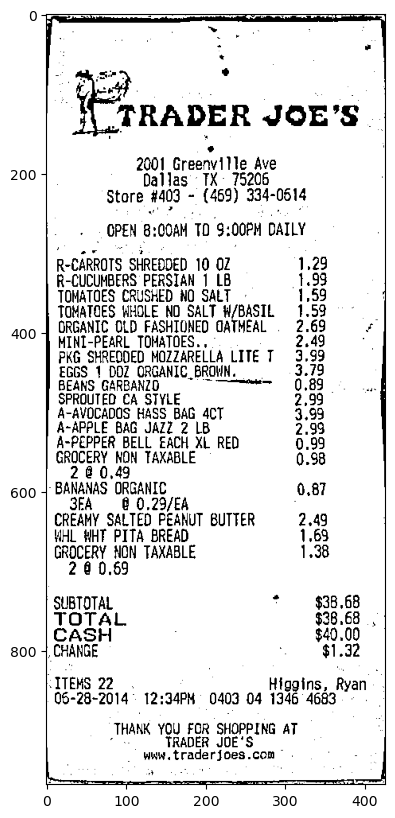

In [4]:
file_name = "/Users/ziqiangzhu/Downloads/result.png"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

# Step 1: Text box detection

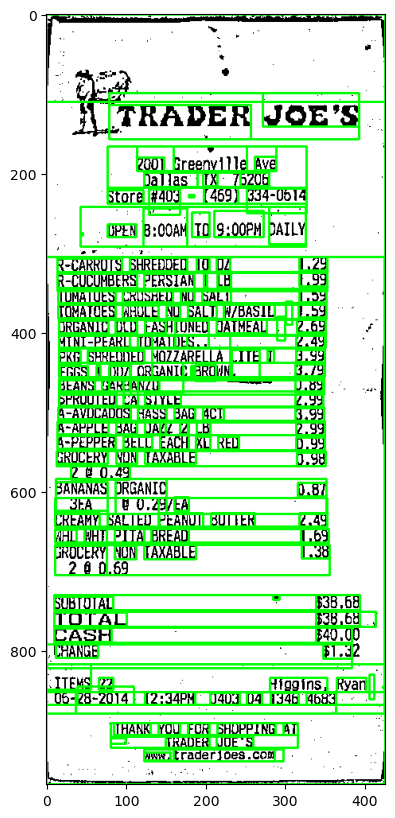

In [5]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

# Step 2: Text recognition

In [6]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

“TRADER JOE’S

2001 GreenviTle Ave
Dallas’: TX: 75206
Store #403 ~ (458) 234-0614

- OPEN coal To ‘g:00PH DAILY

R-CARROTS SHREDDED 10 OZ 1,29
R-CUCUMBERS PERSIAN 1 LB 1.99
TOMATOES CRUSHED NO SALT 1,59
TOMATOES WHOLE NO SALT H/BASIL = 1.59
ORGANIC OLD. Fas TONED GATHEAL . 2.69
MINI-PEARL TOMATOE: 2.49
PKG SHREODED REVAL LITE T 3.99
EGGS 1 DOF GRGANTC | BRO\ 3.79
BEANS GARBANZO 0.89
SPROUTED CA STYLE 2,99
A-AVOCADOS HASS BAG 4CT 3.99
A-APPLE BAG JAZZ 2 LB 2.93
A~PEPPER BELL Fach XL RED 0.99
GROCERY NON TAXABLE 0.98
220,49
BANANAS ORGANS ch 0.87
CREAMY sated PEANUT BUTTER 2.49
WHL WHT PITA BREAD 1,69
GROCERY NON TAXABLE 1,38
SUBTOTAL * $38.68
TOTAL $36.68
CASH $40.0
» CHANGE $1.9
TIES 22 Higgins, Ryan - .
06+ 28-2014" 12:34PM 0403 04 1346 4683

THANK YOU FGR SHOPPING AT
ue TRADER JOE'S

wow. traderjoes.com



# Step 3: Extracting grand total

We will use regular expression to extract all floating point numbers out of the all detected texts.

In [7]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

In [8]:
amounts = find_amounts(extracted_text)
amounts

[1.99,
 1.59,
 2.69,
 2.49,
 3.99,
 3.79,
 0.89,
 2.93,
 0.99,
 0.98,
 0.87,
 38.68,
 36.68]

Grand total is the largest one:

In [9]:
max(amounts)

38.68

Feel free to experiment with other regular expressions to find VAT number, company name, date or even read receipt positions!

# About the Author

This notebook is published under the **Data Science DJ** initiative with the goal of giving you distilled pieces of valuable information, short and concise, easy to comprehend. 

I spend a few hours every day to write a single post about a single concept. You can find them by:

* [Joining my Telegram channel](https://t.me/datasciencedj)
* [Following my LinkedIn tag](https://www.linkedin.com/feed/hashtag/?keywords=datasciencedj)

If this work gives you joy, or maybe even inspiration, please consider contributing to my [Patreon account](https://www.patreon.com/datasciencedj).
Thank you!

# Resources

1. [OCR a document, form, or invoice with Tesseract, OpenCV, and Python](https://www.pyimagesearch.com/2020/09/07/ocr-a-document-form-or-invoice-with-tesseract-opencv-and-python/) by Adrian Rosebrock
2. [Text Detection and Extraction using OpenCV and OCR](https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/) by Anandh Jagadeesan
3. [A comprehensive guide to OCR with Tesseract, OpenCV and Python](https://nanonets.com/blog/ocr-with-tesseract/) by Filip Zelic & Anuj Sable